<a href="https://colab.research.google.com/github/yumnazakkiya/Big_Data_Skintific/blob/main/Modelling_Big_Data_Skintific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Impor Dataset Hasil Scrapping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Dataset_Big_Data/Clean dataset fix.xlsx'
df = pd.read_excel(file_path)
df.head()

,Nama Produk,Harga,Nama Pemberi Ulasan,Ulasan,Rating,Tanggal,cleaned_review,Tokenized,Filtered,Stemmed,Final Text
0,SKINTIFIC 5X Ceramide Barrier Moisture Gel 30g...,Rp129.001,A***n,Produk ini benar-benar bagus! Teksturnya ringa...,5.0,1 bulan lalu,produk ini benar benar bagus teksturnya ringan...,"['produk', 'ini', 'benar', 'benar', 'bagus', '...","['produk', 'bagus', 'teksturnya', 'ringan', 'c...","['produk', 'bagus', 'tekstur', 'ringan', 'cepa...",produk bagus tekstur ringan cepat resap lengke...
1,SKINTIFIC 5X Ceramide Barrier Moisture Gel 30g...,Rp129.001,S***i,"Barang ori, packaging aman, pengiriman cepat, ...",5.0,1 bulan lalu,barang ori packaging aman pengiriman cepat rec...,"['barang', 'ori', 'packaging', 'aman', 'pengir...","['barang', 'ori', 'packaging', 'aman', 'pengir...","['barang', 'ori', 'packaging', 'aman', 'kirim'...",barang ori packaging aman kirim cepat recomend...
2,SKINTIFIC 5X Ceramide Barrier Moisture Gel 30g...,Rp129.001,n***l,"bahannya ringan, gampang banget nyerap, ngelem...",5.0,2 bulan lalu,bahannya ringan gampang banget nyerap ngelemba...,"['bahannya', 'ringan', 'gampang', 'banget', 'n...","['bahannya', 'ringan', 'gampang', 'banget', 'n...","['bahan', 'ringan', 'gampang', 'banget', 'nyer...",bahan ringan gampang banget nyerap ngelembabka...
3,SKINTIFIC 5X Ceramide Barrier Moisture Gel 30g...,Rp129.001,F***l,Saya sangat puas dengan produk ini. Setelah me...,5.0,5 bulan lalu,saya sangat puas dengan produk ini setelah men...,"['saya', 'sangat', 'puas', 'dengan', 'produk',...","['puas', 'produk', 'menggunakannya', 'wajah', ...","['puas', 'produk', 'guna', 'wajah', 'segar', '...",puas produk guna wajah segar lembap tekstur ri...
4,SKINTIFIC 5X Ceramide Barrier Moisture Gel 30g...,Rp129.001,Ester,ini beneran membantu pemulihan kulitku yg semp...,5.0,6 bulan lalu,ini beneran membantu pemulihan kulitku yg semp...,"['ini', 'beneran', 'membantu', 'pemulihan', 'k...","['beneran', 'membantu', 'pemulihan', 'kulitku'...","['beneran', 'bantu', 'pulih', 'kulit', 'yg', '...",beneran bantu pulih kulit yg sempet rusak bang...


Preprocessing

In [ ]:
# Hapus duplikat dan nilai kosong
df = df.drop_duplicates()
df = df.dropna(subset=['Final Text'])
df.reset_index(drop=True, inplace=True)

In [ ]:
# Cek hasil teks setelah preprocessing
df['Final Text'].head()

,Final Text
0,produk bagus tekstur ringan cepat resap lengke...
1,barang ori packaging aman kirim cepat recomend...
2,bahan ringan gampang banget nyerap ngelembabka...
3,puas produk guna wajah segar lembap tekstur ri...
4,beneran bantu pulih kulit yg sempet rusak bang...


In [ ]:
# Tambahkan panjang karakter dan jumlah kata
df['char_length'] = df['Final Text'].apply(len)
df['word_count'] = df['Final Text'].apply(lambda x: len(x.split()))

# Statistik
print(df[['char_length', 'word_count']].describe())

# Kata paling sering muncul
from collections import Counter
word_freq = Counter(' '.join(df['Final Text']).split())
print(word_freq.most_common(10))

       char_length   word_count
count  4896.000000  4896.000000
mean     52.190155     8.689542
std      32.170828     5.456301
min       1.000000     1.000000
25%      29.000000     5.000000
50%      45.000000     7.000000
75%      70.000000    12.000000
max     170.000000    32.000000
[('kulit', 2004), ('cocok', 1432), ('kirim', 892), ('tipe', 861), ('cepat', 845), ('moga', 799), ('barang', 751), ('bagus', 741), ('aman', 594), ('produk', 564)]


Visualisasi Distribusi Panjang Teks & Visualisasi WordCloud

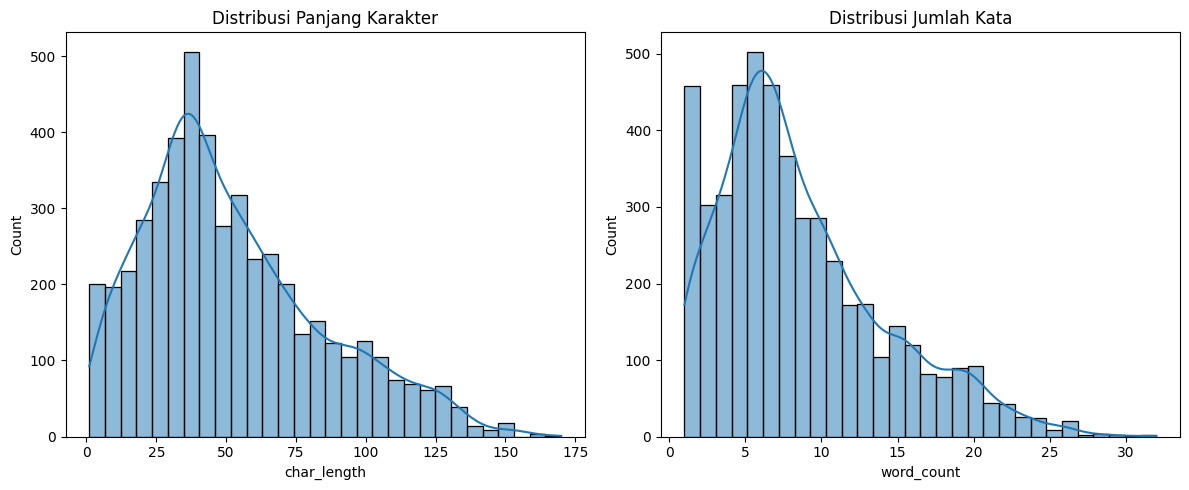

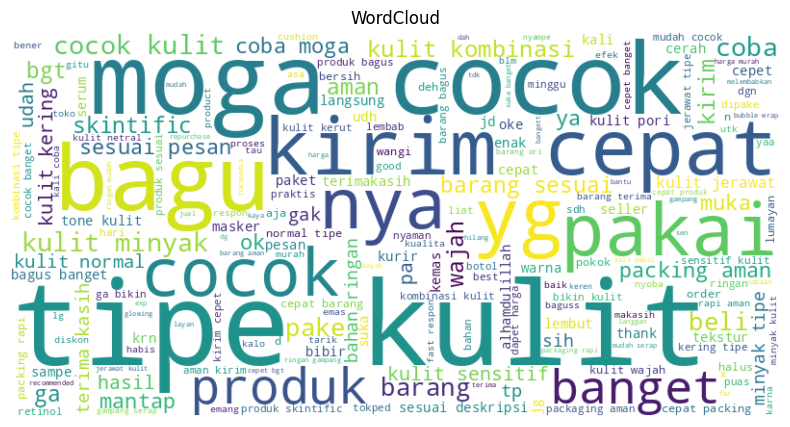

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi panjang teks
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['char_length'], bins=30, kde=True)
plt.title("Distribusi Panjang Karakter")

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribusi Jumlah Kata")

plt.tight_layout()
plt.show()

# WordCloud
from wordcloud import WordCloud

text = ' '.join(df['Final Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud")
plt.show()

Korelasi Word Count dan Character Length

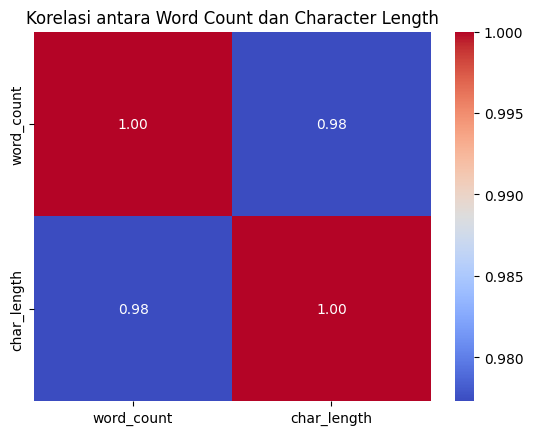

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi
corr = df[['word_count', 'char_length']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Word Count dan Character Length")
plt.show()

Instalasi dan Impor Pustaka untuk Analisis Teks

In [ ]:
!pip install textblob deep-translator openpyxl --quiet

import pandas as pd
from textblob import TextBlob
from deep_translator import GoogleTranslator
import time
import sys

In [ ]:
df = pd.read_excel(file_path)

if 'Final Text' not in df.columns:
    raise ValueError("Kolom 'Final Text' tidak ditemukan dalam dataset!")

df = df.dropna(subset=['Final Text']).reset_index(drop=True)

Terjemahan Teks Menggunakan Google Translate

In [ ]:
def translate_text(text):
    try:
        if not text or pd.isna(text):
            return ''
        if len(text) > 5000:
            text = text[:5000]
        return GoogleTranslator(source='auto', target='en').translate(str(text))
    except Exception as e:
        print("Gagal translate:", e)
        time.sleep(1)
        return ''

In [ ]:
print("Mulai menerjemahkan...")
total_rows = len(df)
translated_text = []

for idx, text in enumerate(df['Final Text'], start=1):
    sys.stdout.write(f"\rMenerjemahkan baris ke-{idx}/{total_rows}")
    sys.stdout.flush()
    translated_text.append(translate_text(text))

df['Final Text (en)'] = translated_text
print(f"\nTerjemahan selesai. Telah menerjemahkan {len(translated_text)} baris dari {total_rows}.")

Mulai menerjemahkan...
Menerjemahkan baris ke-5147/5147
Terjemahan selesai. Telah menerjemahkan 5147 baris dari 5147.


Analisis Sentimen dengan TextBlob

In [ ]:
# Simpan hasil ke file Excel
df.to_excel('hasil_terjemahan_sentimen.xlsx', index=False)
print("Hasil disimpan ke 'hasil_terjemahan_sentimen.xlsx'")

# Tampilkan 10 baris pertama untuk pengecekan
from IPython.display import display

# Ambil kolom yang diperlukan dan tampilkan sebagian
selected_columns = df[['Final Text', 'Final Text (en)', 'Sentiment']]
display(selected_columns.head(10))

Hasil disimpan ke 'hasil_terjemahan_sentimen.xlsx'


,Final Text,Final Text (en),Sentiment
0,produk bagus tekstur ringan cepat resap lengke...,good product good light texture fast sticky st...,positive
1,barang ori packaging aman kirim cepat recomend...,Ori packaging items Safe Send Fast Recommended...,positive
2,bahan ringan gampang banget nyerap ngelembabka...,Lightweight Materials Banget Works to moisturi...,positive
3,puas produk guna wajah segar lembap tekstur ri...,satisfied product for fresh face moisturizes l...,positive
4,beneran bantu pulih kulit yg sempet rusak bang...,really helps to recover the skin that was real...,negative
5,kulit sensitif pake bukti aman efek bagus raji...,sensitive skin using safe proof of good effect...,positive
6,kirim super cepat produk bagus reviewnya bagus...,Send super fast product good review good use r...,positive
7,better beli ukur jumbo karna kalo hitung hitun...,better beli size if you count count price jumb...,positive
8,benar bagus coba langsung jatuh cinta tekstur ...,really good try to fall directly in love with ...,positive
9,gampang serap enak pakai pakai kali langsung h...,Easy to absorb tasty using the time directly t...,positive


Jumlah sentimen:
Sentiment
positive    3889
neutral      975
negative     283
Name: count, dtype: int64


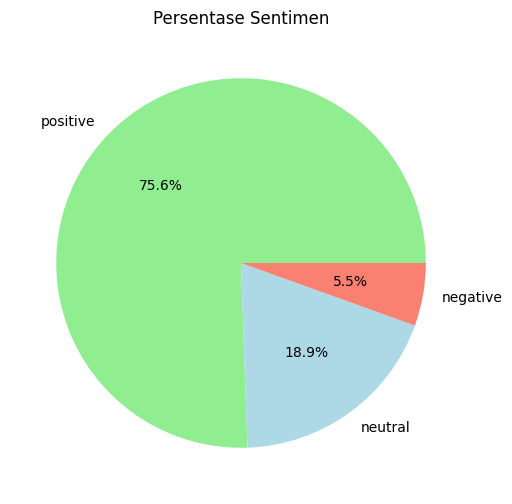

<ipython-input-20-b271c85f2e32>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2', order=['positive', 'neutral', 'negative'])


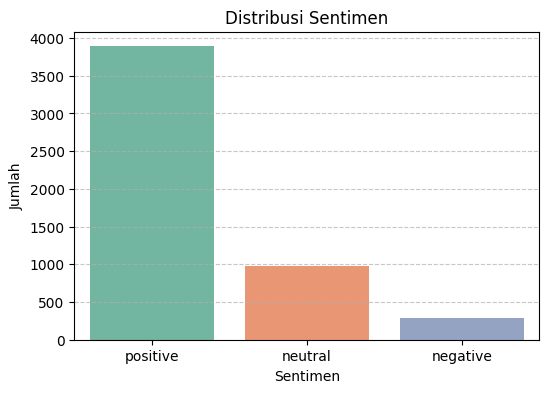

In [ ]:
# Fungsi analisis sentimen berdasarkan teks terjemahan
def get_sentiment(text):
    try:
        polarity = TextBlob(str(text)).sentiment.polarity
        if polarity > 0:
            return 'positive'
        elif polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    except:
        return 'neutral'

df['Sentiment'] = df['Final Text (en)'].apply(get_sentiment)
sentiment_counts = df['Sentiment'].value_counts()

print("Jumlah sentimen:")
print(sentiment_counts)

plt.figure(figsize=(6, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title('Persentase Sentimen')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df, palette='Set2', order=['positive', 'neutral', 'negative'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

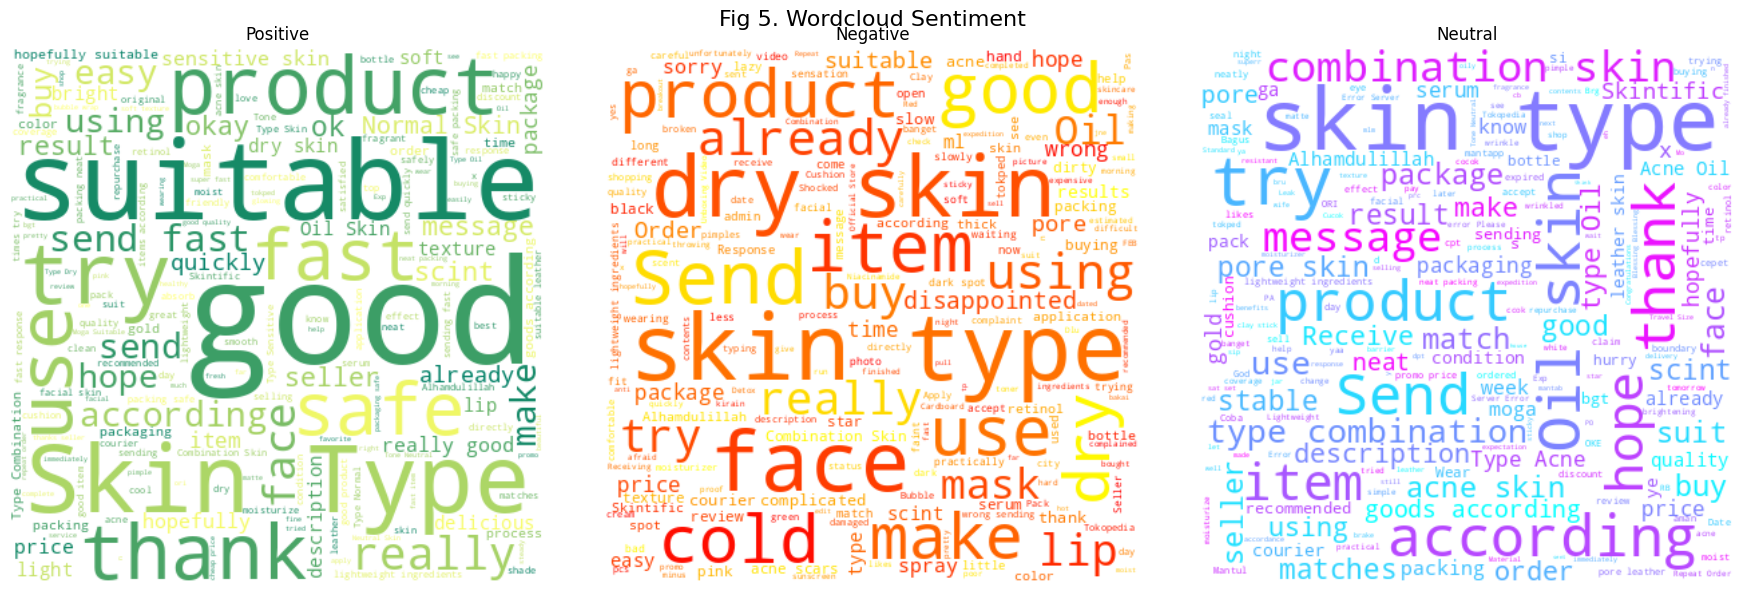

In [ ]:
# Pisahkan teks berdasarkan sentimen
positive_text = " ".join(df[df['Sentiment'] == 'positive']['Final Text (en)'].dropna().astype(str))
negative_text = " ".join(df[df['Sentiment'] == 'negative']['Final Text (en)'].dropna().astype(str))
neutral_text  = " ".join(df[df['Sentiment'] == 'neutral']['Final Text (en)'].dropna().astype(str))

# Buat WordCloud untuk setiap sentimen
wordcloud_pos = WordCloud(width=400, height=400, background_color='white', colormap='summer').generate(positive_text)
wordcloud_neg = WordCloud(width=400, height=400, background_color='white', colormap='autumn').generate(negative_text)
wordcloud_neu = WordCloud(width=400, height=400, background_color='white', colormap='cool').generate(neutral_text)

# Tampilkan dalam 1 baris 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0].set_title('Positive')
axs[0].axis('off')

axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[1].set_title('Negative')
axs[1].axis('off')

axs[2].imshow(wordcloud_neu, interpolation='bilinear')
axs[2].set_title('Neutral')
axs[2].axis('off')

plt.suptitle("Fig 5. Wordcloud Sentiment", fontsize=16)
plt.tight_layout()
plt.show()

Ekstraksi Fitur dengan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Lakukan TF-IDF pada kolom hasil terjemahan
tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=3,
    max_df=0.7,
    stop_words='english',
    ngram_range=(1, 3)
)

X = tfidf.fit_transform(df['Final Text (en)'])
y = df['Sentiment']

Pelatihan dan Evaluasi Model Naive Bayes

Naive Bayes Training time: 0.0351s; Prediction time: 0.0051s

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        57
     neutral       0.77      0.30      0.43       195
    positive       0.80      0.98      0.88       778

    accuracy                           0.80      1030
   macro avg       0.52      0.43      0.44      1030
weighted avg       0.75      0.80      0.75      1030

Akurasi: 0.7980582524271844


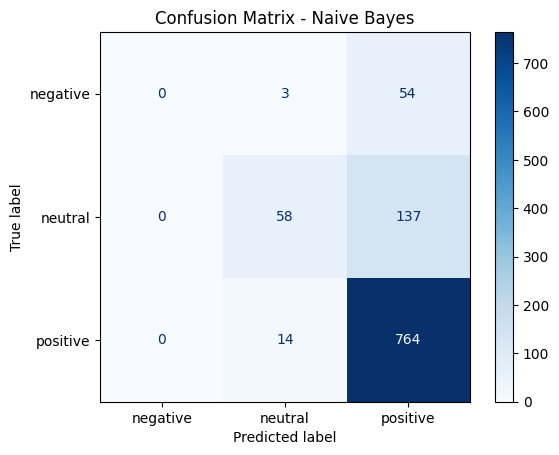

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

# Buat model Naive Bayes
model_nb = MultinomialNB()

# Training
t1 = time.time()
model_nb.fit(X_train, y_train)
t2 = time.time()

# Prediksi
y_pred = model_nb.predict(X_test)
t3 = time.time()

# Waktu
train_time = t2 - t1
predict_time = t3 - t2
print(f"Naive Bayes Training time: {train_time:.4f}s; Prediction time: {predict_time:.4f}s")

# Evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Akurasi:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_nb.classes_)

# Visualisasi
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.grid(False)
plt.show()